# 12. Textúry

In [15]:
from skimage import data,color,io
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import trange, tqdm
from skimage import morphology

from skimage.filters.rank import entropy
from skimage.feature import greycomatrix, greycoprops

In [16]:
plt.rcParams['text.color'] = 'w'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'w'
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

Text(0.5, 1.0, '4th channel')

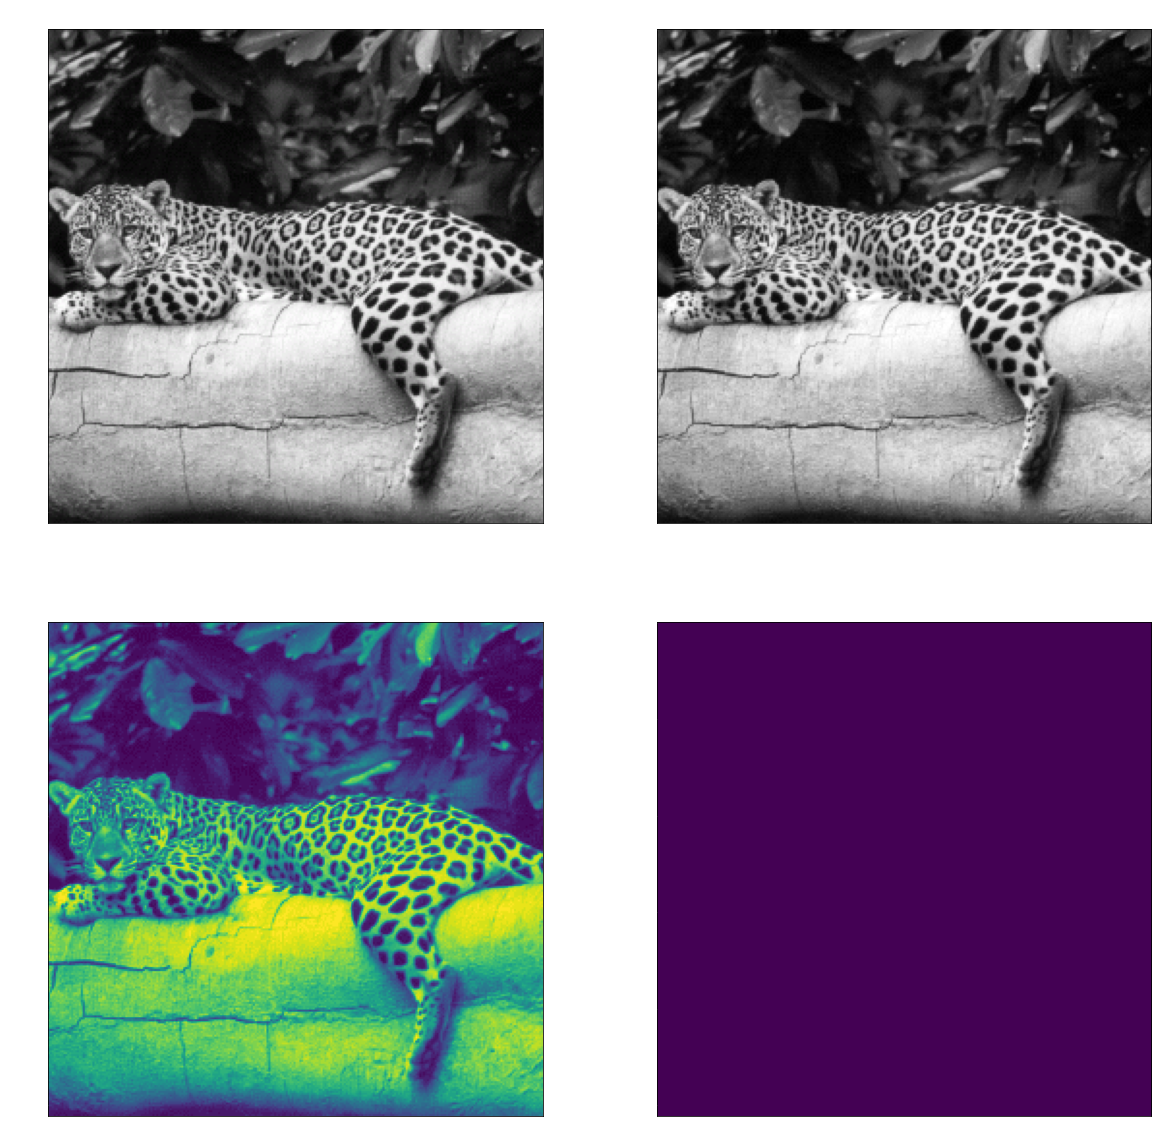

In [17]:
I = io.imread('imgs/jaguar.gif')

plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(I[...,0:3])
plt.title('3 channels as RGB')
plt.subplot(222)
I_gray=(color.rgb2gray(I[...,0:3])*255).astype(np.uint8)
plt.title('3 channels to gray')
plt.imshow(I_gray,cmap='gray')
plt.subplot(223)
plt.imshow(I[...,0])
plt.title('1st channel')

plt.subplot(224)
plt.imshow(I[...,3])
plt.title('4th channel')

Text(0.5, 1.0, 'Entropia')

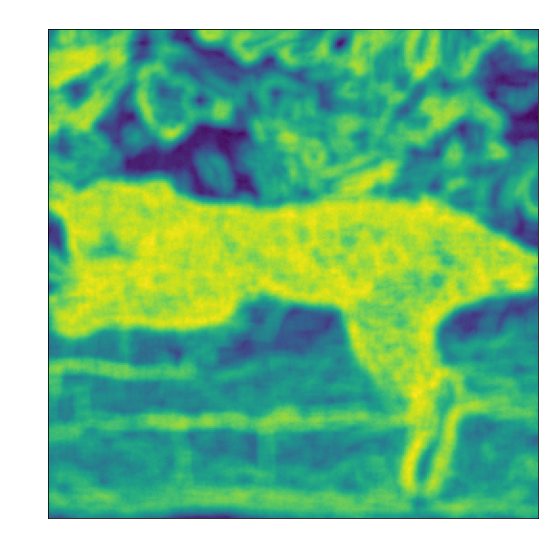

In [18]:
im_entropy = entropy(I_gray,morphology.disk(5))
plt.figure(figsize=(9,9))
plt.imshow(im_entropy)
plt.title('Entropia')

*  Kontrast, rozdiel intenzitami jasu pixelu a jeho susedov v celom výreze. Kontrast je nulový
pre konštantný obraz.
* Korelácia, štatistická miera závislosti hodnoty jasu pixelu od hodnôt jasov jeho susedov.
*  Energia, určuje mieru usporiadanosti obrazu.
* Homogénnosť, kvalita určujúca mieru podobnosti rôznych oblastí obrazu.

In [19]:
im_contrast = np.zeros(im_entropy.shape)
im_correlation = np.zeros(im_entropy.shape)
im_energy = np.zeros(im_entropy.shape)
im_homogeneity = np.zeros(im_entropy.shape)

In [20]:
distances = [1]
angles = [0]
properties= ['contrast','correlation','energy','homogeneity']
window_size = 9

for i in tqdm(range(0,im_entropy.shape[0]-window_size)):
    for j in range(0,im_entropy.shape[0]-window_size):

        glcm = greycomatrix(I_gray[i:i+window_size,j:j+window_size],
                            distances=distances,
                            angles=angles,
                            symmetric=True,
                            normed=True)

        feats = np.hstack([greycoprops(glcm, prop).ravel() for prop in properties])
        im_contrast[i,j] = feats[0]
        im_correlation[i,j] = feats[1]
        im_energy[i,j] = feats[2]
        im_homogeneity[i,j] = feats[3]

Text(0.5, 1.0, 'Homogeinity')

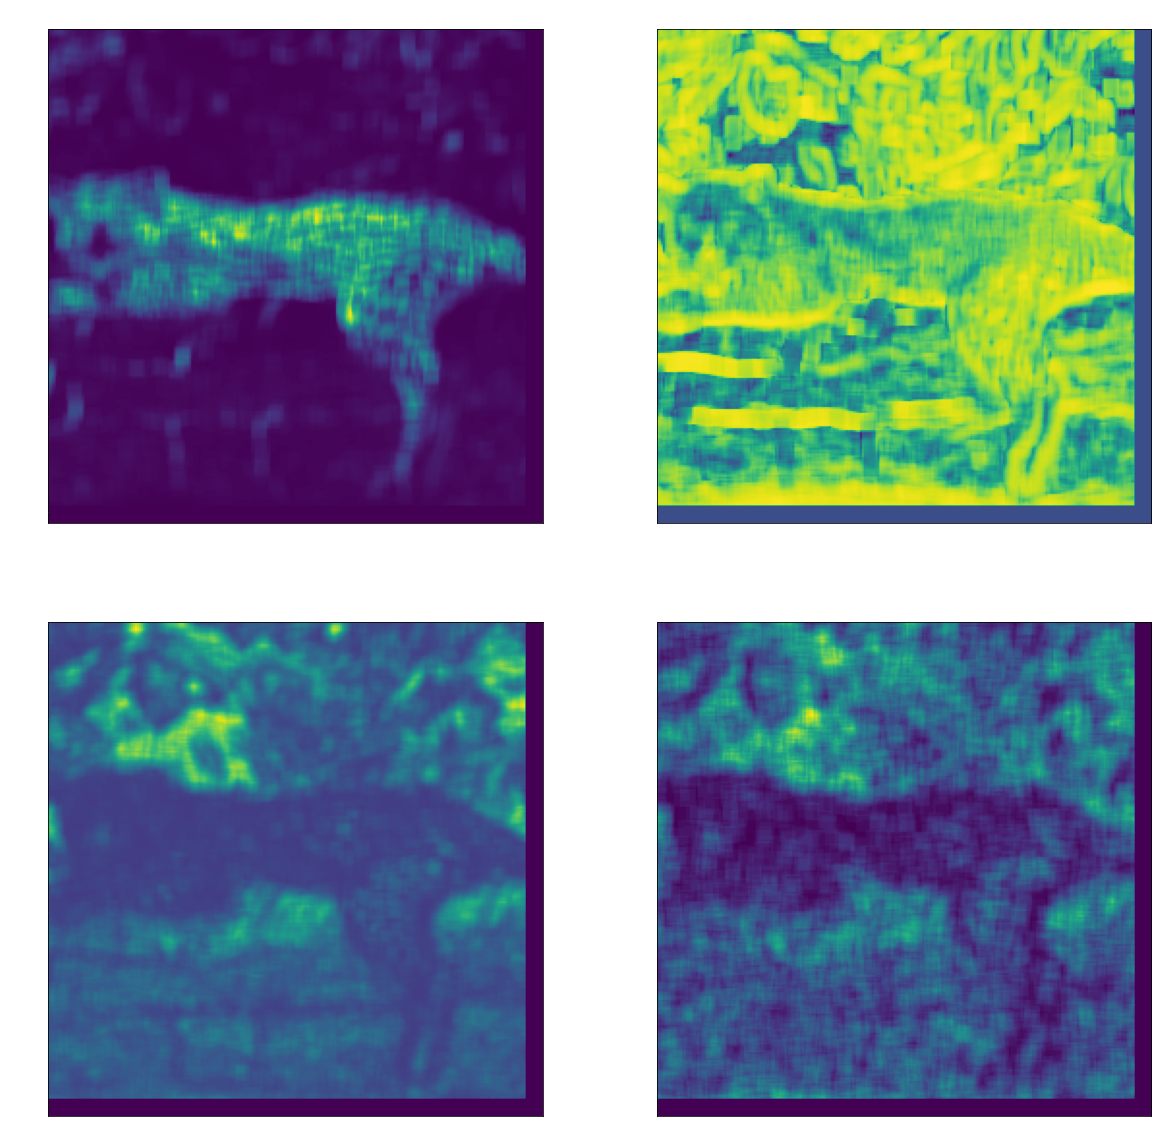

In [21]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(im_contrast)
plt.title('Contrast')

plt.subplot(222)
plt.imshow(im_correlation)
plt.title('Correlation')

plt.subplot(223)
plt.imshow(im_energy)
plt.title('Energy')

plt.subplot(224)
plt.imshow(im_homogeneity)
plt.title('Homogeinity')

Text(0, 0.5, 'Kontrast')

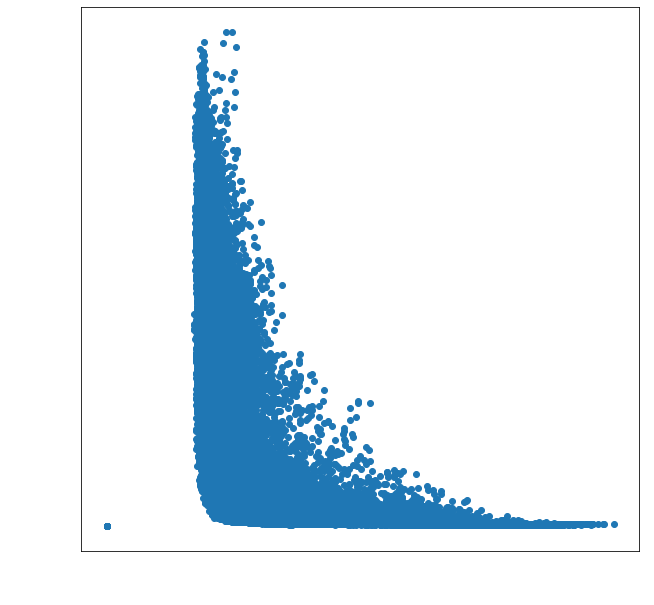

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(im_energy.ravel(),im_contrast.ravel())
plt.xlabel('Energia')
plt.ylabel('Kontrast')

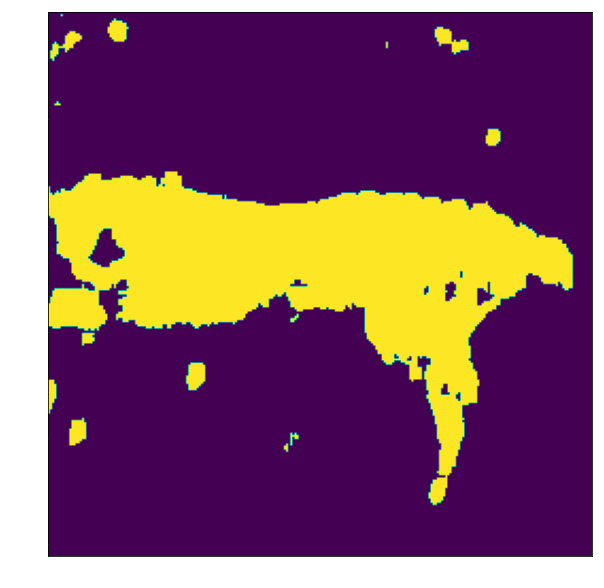

In [29]:
plt.figure(figsize=(10,10))

plt.imshow(np.logical_and(im_energy<0.15,im_contrast>1000))

# D.U dokoncit
# https://www.mathworks.com/help/images/ref/graycomatrix.html